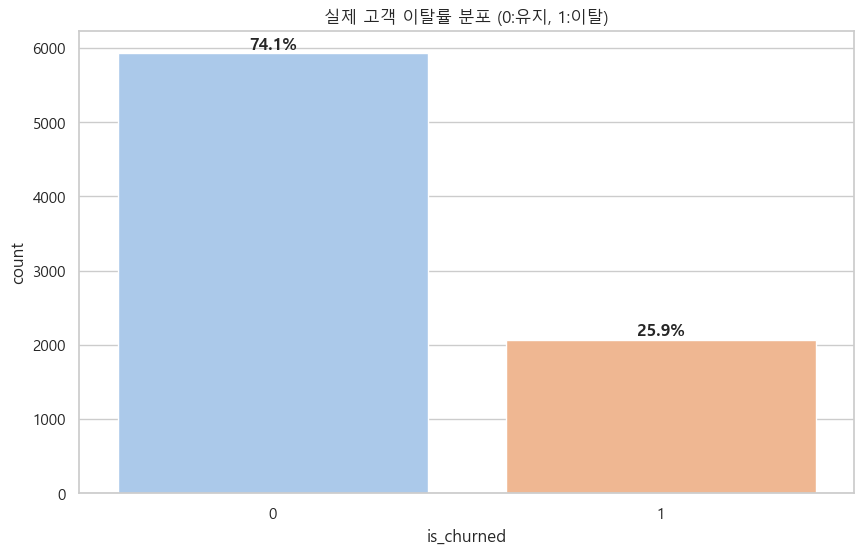

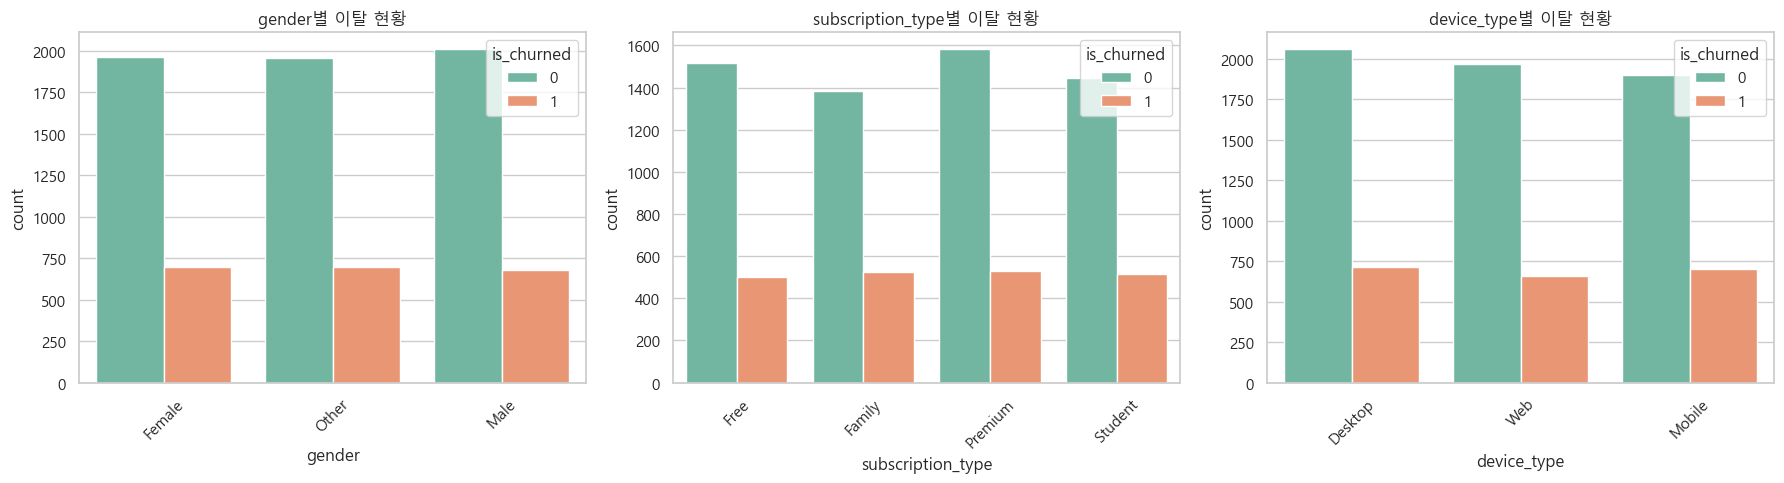

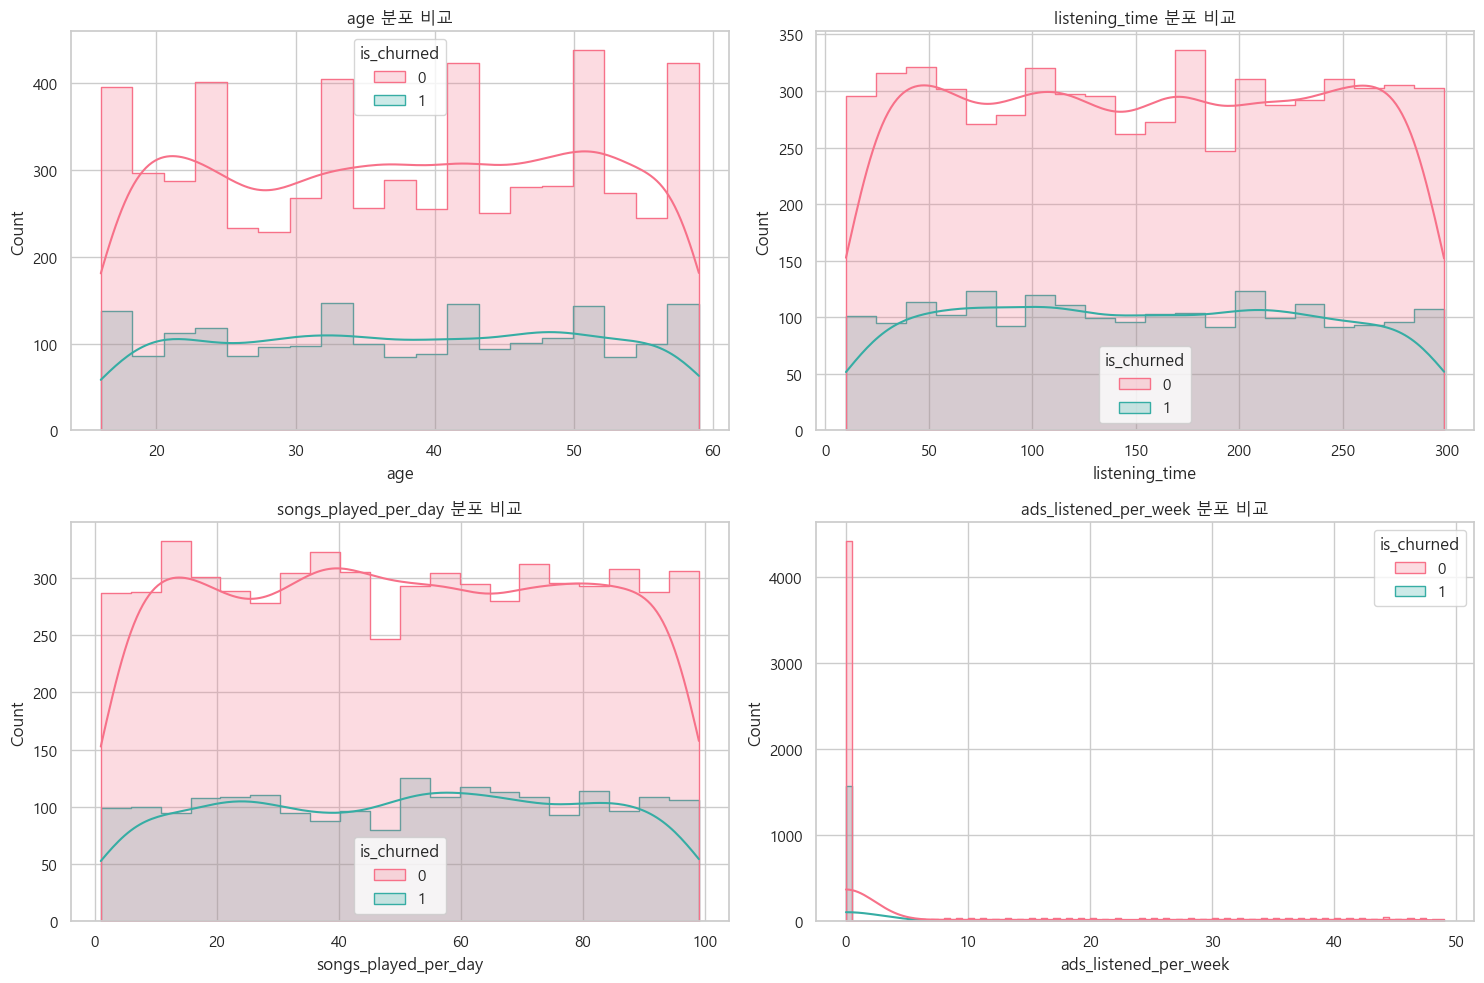

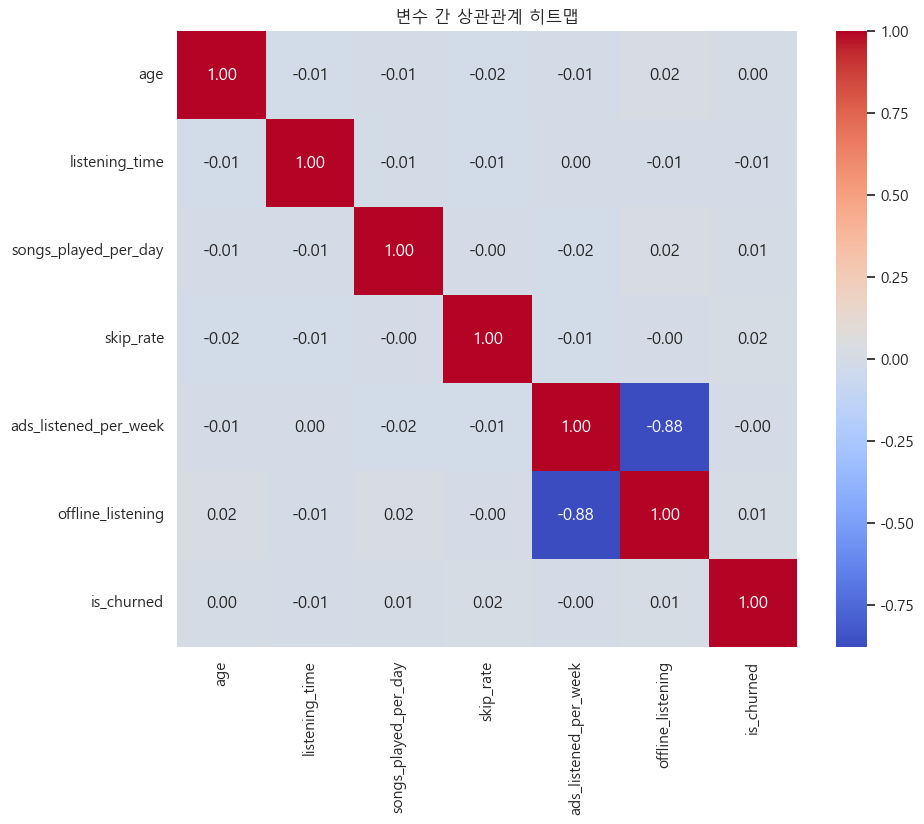

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import platform

# 1. 경고 메시지 무시 (Warnings 제거)
warnings.filterwarnings('ignore')

# 2. 데이터 로드
df = pd.read_csv('data/spotify_churn_dataset.csv')

# 3. 한글 폰트 및 마이너스 기호 깨짐 방지 설정
system_name = platform.system()

if system_name == 'Windows':
    # 윈도우 사용자의 경우 '맑은 고딕' 설정
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    # 맥(Mac) 사용자의 경우 'AppleGothic' 설정
    plt.rc('font', family='AppleGothic')
else:
    # 리눅스 등 기타 OS (코랩 포함)
    # 폰트가 설치되어 있어야 함 (나눔고딕 등)
    try:
        plt.rc('font', family='NanumGothic')
    except:
        print("한글 폰트 설정이 필요합니다.")

plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스(-) 기호 깨짐 방지
sns.set(style="whitegrid") 

# 폰트 설정이 sns.set()에 의해 초기화될 수 있으므로 다시 한 번 적용
if system_name == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif system_name == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'

plt.rcParams['figure.figsize'] = (10, 6)

# 1. 진짜 이탈률 파악 (Target Distribution)
plt.figure()
# 수정: palette를 쓸 때는 hue를 지정하고 legend=False를 주는 것이 최신 권장 사항입니다.
ax = sns.countplot(x='is_churned', data=df, hue='is_churned', palette='pastel', legend=False)
plt.title('실제 고객 이탈률 분포 (0:유지, 1:이탈)')

# 비율 표시
total = len(df)
for p in ax.patches:
    if p.get_height() > 0: # 데이터가 있는 경우만 표시
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()

# 2. 범주형 변수 분석 (성별, 구독유형 등과 이탈의 관계)
categorical_cols = ['gender', 'subscription_type', 'device_type']

plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    # 수정: x와 hue를 동일하게 설정하거나, hue에 따라 색상을 나눕니다.
    # 여기서는 'is_churned'에 따라 색상을 나누는 것이 목적이므로 그대로 둡니다.
    sns.countplot(x=col, hue='is_churned', data=df, palette='Set2')
    plt.title(f'{col}별 이탈 현황')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. 수치형 변수 분석 (나이, 청취시간 등과 이탈의 관계)
numerical_cols = ['age', 'listening_time', 'songs_played_per_day', 'ads_listened_per_week']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, hue='is_churned', kde=True, element="step", palette='husl')
    plt.title(f'{col} 분포 비교')
plt.tight_layout()
plt.show()

# 4. 상관관계 분석 (Correlation)
# 상관관계는 숫자만 가능하므로 범주형 제외 후 계산
plt.figure(figsize=(10, 8))
# 간단하게 수치형 컬럼만 선택해서 상관관계 확인
corr_df = df.select_dtypes(include=['number'])
# user_id가 있다면 제거 (없으면 에러나지 않도록 errors='ignore' 추가)
if 'user_id' in corr_df.columns:
    corr_df = corr_df.drop(columns=['user_id'])

sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('변수 간 상관관계 히트맵')
plt.show()